# Notes for decentmon data processing

In [64]:
# adding required packages if not present
!pip install numpy pandas seaborn matplotlib sklearn

# importing them
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.neighbors import KNeighborsClassifier
import decmon.extractor as extractor
from decmon.cleaner import *
from decmon.filter import *

In [65]:
# Constants
FILENAME = "../decent/log.txt"

In [66]:
# idempotent transformation of input file to csv
# file = open(FILENAME, "rt")
# raw_data = file.read()
# raw_data = raw_data.replace(' ', ',') #add commas to read it as a csv
# file.close()
# file = open(FILENAME, "wt")
# file.write(raw_data)
# file.close()

In [67]:
df = pd.read_csv(FILENAME, sep='@')
df.insert(0, 'formula_id', range(0, len(df)))
df.columns = df.columns.str.strip()
df

,formula_id,x,cent_trace_len,decent_trace_len,odecent_trace_len,cent_num_mess,decent_num_mess,odecent_num_mess,cent_size_mess,decent_size_mess,odecent_size_mess,cent_nb_progressions,decent_nb_progressions,odecent_nb_progressions,formula,trace
0,0,1,2,3,2,3,0,0,1.0,0.00,0.00,3,3,3,"Next (Var ""b"")",{a|b| } ; { | | } ; {a| | } ; { | |c} ; { |b|...
1,1,1,2,3,2,3,2,0,1.0,1.66,0.00,4,4,4,"Ev (Var ""b"")",{ | |c} ; {a|b|c} ; {a| |c} ; {a|b|c} ; { |b|...
2,2,1,2,3,2,3,0,0,1.0,0.00,0.00,3,3,3,"Next (Var ""a"")",{ |b|c} ; {a| | } ; {a| |c} ; { | | } ; {a|b|...
3,3,1,6,7,6,15,2,0,1.0,0.55,0.00,12,24,12,"Glob (Var ""b"")",{a|b| } ; {a|b|c} ; { |b| } ; { |b|c} ; {a|b|...
4,4,1,2,3,2,3,2,0,1.0,1.66,0.00,4,8,4,"Glob (Var ""c"")",{a| |c} ; { | | } ; { | | } ; {a| | } ; {a| |...
5,5,1,2,3,2,3,0,0,1.0,0.00,0.00,3,3,3,"Next (Var ""b"")",{a|b|c} ; { |b| } ; { |b| } ; {a| |c} ; { | |...
6,6,1,4,5,4,9,2,0,1.0,0.83,0.00,8,12,8,"Ev (Var ""c"")",{a| | } ; { |b| } ; {a|b| } ; {a| |c} ; { | |...
7,7,1,2,3,2,3,0,0,1.0,0.00,0.00,3,3,3,"Next (Var ""a"")",{a|b|c} ; {a| |c} ; {a| | } ; {a|b|c} ; {a| |...
8,8,1,4,5,4,9,2,0,1.0,0.83,0.00,8,16,8,"Glob (Var ""b"")",{ |b| } ; { |b| } ; {a|b| } ; {a| |c} ; { |b|...
9,9,1,2,3,2,3,0,0,1.0,0.00,0.00,3,3,3,"Next (Var ""c"")",{a|b| } ; {a| |c} ; {a|b|c} ; {a|b| } ; {a|b|...


In [68]:
strategies = {
    "cent" : "orchestration",
    "decent" : "migration",
    "odecent" : "choreography"
}

In [69]:
strategies_df = []
for key, name in strategies.items():
    others = {x: strategies[x] for x in strategies if x != key}
    other_keys = list(others.keys())
    local = rename(df, fr"^{key}_(.*)", r"\1")
    local = exclude_annotate(local, exclude=other_keys, annotate=name)
    strategies_df.append(local)

(cent, decent, odecent) = strategies_df
cent

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,2,3,1.0,3,"Next (Var ""b"")",{a|b| } ; { | | } ; {a| | } ; { | |c} ; { |b|...,orchestration
1,1,1,2,3,1.0,4,"Ev (Var ""b"")",{ | |c} ; {a|b|c} ; {a| |c} ; {a|b|c} ; { |b|...,orchestration
2,2,1,2,3,1.0,3,"Next (Var ""a"")",{ |b|c} ; {a| | } ; {a| |c} ; { | | } ; {a|b|...,orchestration
3,3,1,6,15,1.0,12,"Glob (Var ""b"")",{a|b| } ; {a|b|c} ; { |b| } ; { |b|c} ; {a|b|...,orchestration
4,4,1,2,3,1.0,4,"Glob (Var ""c"")",{a| |c} ; { | | } ; { | | } ; {a| | } ; {a| |...,orchestration
5,5,1,2,3,1.0,3,"Next (Var ""b"")",{a|b|c} ; { |b| } ; { |b| } ; {a| |c} ; { | |...,orchestration
6,6,1,4,9,1.0,8,"Ev (Var ""c"")",{a| | } ; { |b| } ; {a|b| } ; {a| |c} ; { | |...,orchestration
7,7,1,2,3,1.0,3,"Next (Var ""a"")",{a|b|c} ; {a| |c} ; {a| | } ; {a|b|c} ; {a| |...,orchestration
8,8,1,4,9,1.0,8,"Glob (Var ""b"")",{ |b| } ; { |b| } ; {a|b| } ; {a| |c} ; { |b|...,orchestration
9,9,1,2,3,1.0,3,"Next (Var ""c"")",{a|b| } ; {a| |c} ; {a|b|c} ; {a|b| } ; {a|b|...,orchestration


In [70]:
sdf = pd.concat(strategies_df, ignore_index=True)
sdf

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,2,3,1.00,3,"Next (Var ""b"")",{a|b| } ; { | | } ; {a| | } ; { | |c} ; { |b|...,orchestration
1,1,1,2,3,1.00,4,"Ev (Var ""b"")",{ | |c} ; {a|b|c} ; {a| |c} ; {a|b|c} ; { |b|...,orchestration
2,2,1,2,3,1.00,3,"Next (Var ""a"")",{ |b|c} ; {a| | } ; {a| |c} ; { | | } ; {a|b|...,orchestration
3,3,1,6,15,1.00,12,"Glob (Var ""b"")",{a|b| } ; {a|b|c} ; { |b| } ; { |b|c} ; {a|b|...,orchestration
4,4,1,2,3,1.00,4,"Glob (Var ""c"")",{a| |c} ; { | | } ; { | | } ; {a| | } ; {a| |...,orchestration
...,...,...,...,...,...,...,...,...,...
76,22,3,14,13,2.51,81,"Next (Ev (And (Var ""b"", Var ""c"")))",{ | | } ; { | | } ; {a| | } ; {a| |c} ; { | |...,choreography
77,23,3,16,15,2.57,191,"Ev (Next (And (Var ""a"", Var ""b"")))",{ | |c} ; {a| | } ; { |b|c} ; { |b|c} ; { | |...,choreography
78,24,3,13,11,2.22,123,"Ev (And (Neg (Var ""a""), Next (Var ""c"")))",{a| |c} ; { | | } ; {a| | } ; { | | } ; {a|b|...,choreography
79,25,3,9,0,0.00,18,"Glob (Var ""b"")",{a|b| } ; { |b| } ; { |b| } ; {a|b|c} ; {a|b|...,choreography


In [74]:
def extract_metric(df, metric):
    """
    Extracts the given column metric to the pair of columns (metric, value)
    :param df: the dataframe having the current metric
    :param metric: the metric to extract
    :return: a copy of the original dataframe where the metric column is replaced with the pair (metric, value)
    """
    data = df[['formula_id', 'strategy', metric]].copy()
    data['metric'] = metric
    data = data.rename(columns={metric:"value"})
    return data

trace_length = extract_metric(sdf, "trace_len")
num_mess = extract_metric(sdf, "num_mess")
size_mess = extract_metric(sdf, "size_mess")
nb_progressions = extract_metric(sdf, "nb_progressions")
merged_metrics = pd.concat([trace_length, num_mess, size_mess, nb_progressions])
merged_metrics

,formula_id,strategy,value,metric
0,0,orchestration,2.0,trace_len
1,1,orchestration,2.0,trace_len
2,2,orchestration,2.0,trace_len
3,3,orchestration,6.0,trace_len
4,4,orchestration,2.0,trace_len
...,...,...,...,...
76,22,choreography,81.0,nb_progressions
77,23,choreography,191.0,nb_progressions
78,24,choreography,123.0,nb_progressions
79,25,choreography,18.0,nb_progressions


In [77]:
def plot(data, ax=None):
    """
    Plots the data from a single-strategy dataframe
    :param data: single-strategy dataframe
    :return: nothing. Plots the data
    """
    g = sns.catplot(
        #ax=ax,
        data=data, kind="bar",
        ci="sd", palette="dark", alpha=.8, height=6
    )
    g.set_axis_labels("", "Count")

/Users/enniovisco/.pyenv/versions/3.9.11/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


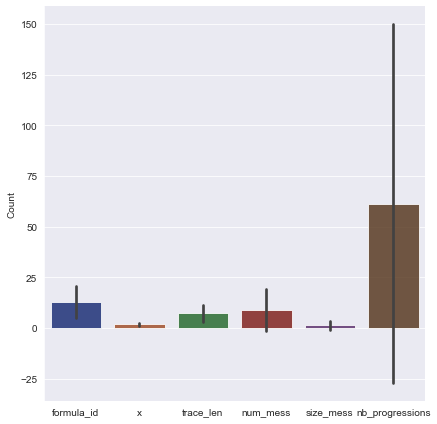

In [78]:
# Plotting
plot(sdf)

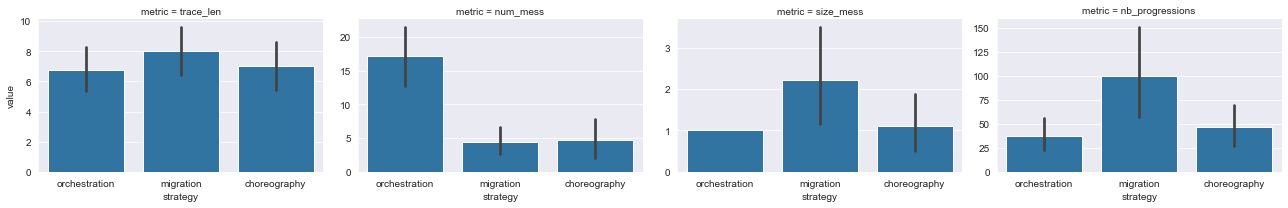

In [79]:
g = sns.FacetGrid(merged_metrics, col="metric", aspect=1.5, sharey=False)
g.map(sns.barplot, "strategy", "value", order=["orchestration", "migration", "choreography"])

In [80]:
ndf = merged_metrics.copy()
ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1")
ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2")
ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3")
ndf

/var/folders/p7/3_3g7g_x7t9dc251z7lwpqqm0000gn/T/ipykernel_47688/127303089.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1")
/var/folders/p7/3_3g7g_x7t9dc251z7lwpqqm0000gn/T/ipykernel_47688/127303089.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2")
/var/folders/p7/3_3g7g_x7t9dc251z7lwpqqm0000gn/T/ipykernel_47688/127303089.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3")


,formula_id,strategy,value,metric
0,0,orchestration,2.0,trace_len
1,1,orchestration,2.0,trace_len
2,2,orchestration,2.0,trace_len
3,3,orchestration,6.0,trace_len
4,4,orchestration,2.0,trace_len
...,...,...,...,...
76,22,choreography,81.0,nb_progressions
77,23,choreography,191.0,nb_progressions
78,24,choreography,123.0,nb_progressions
79,25,choreography,18.0,nb_progressions


In [81]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(ndf, 'strategy')


ValueError: could not convert string to float: 'orchestration'